In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


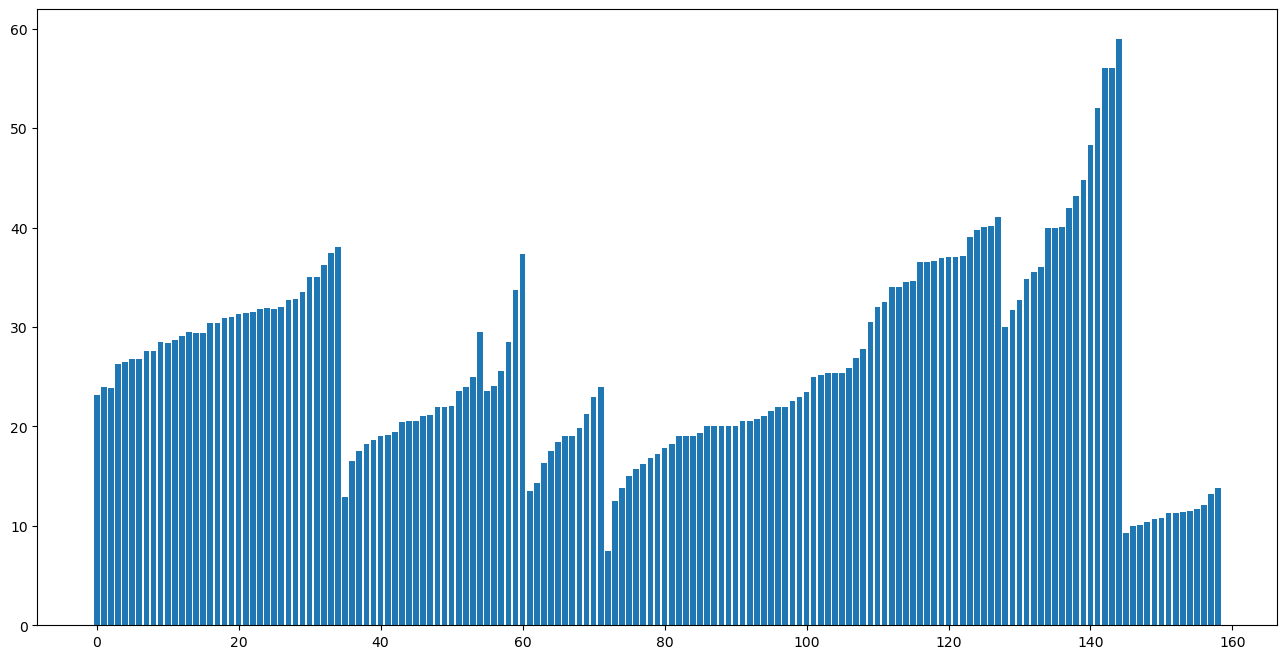

In [3]:
fig = plt.figure(figsize=(16,8))
plt.bar(range(data.shape[0]),data.Length1)
plt.show()

In [5]:
speciesNames = data.Species.unique()
speciesNums = list(range(len(speciesNames)))
mappings = dict(zip(speciesNames,speciesNums))
mappings

{'Bream': 0,
 'Roach': 1,
 'Whitefish': 2,
 'Parkki': 3,
 'Perch': 4,
 'Pike': 5,
 'Smelt': 6}

In [6]:
numbers = []
for i in data.Species:
    numbers.append(mappings[i])

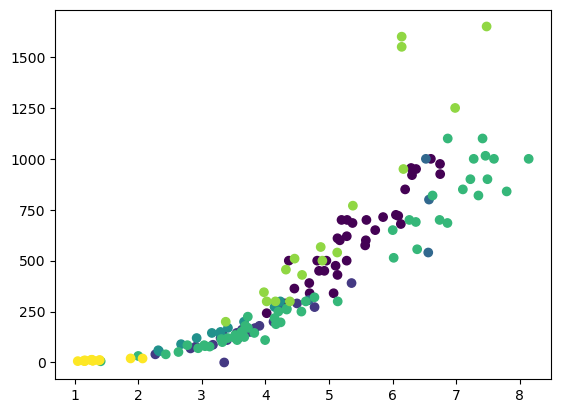

In [9]:
plt.scatter(data.Width,data.Weight,c=numbers)

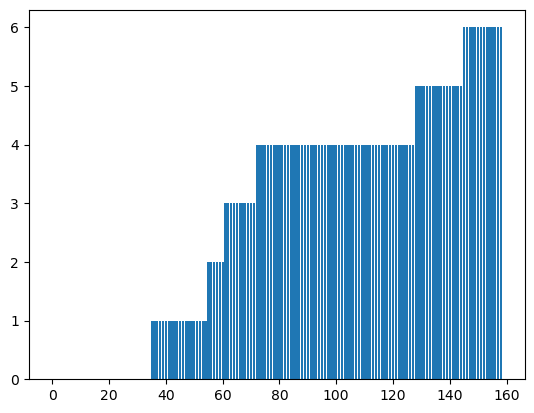

In [10]:
plt.bar(range(len(numbers)),numbers)
plt.show()

In [11]:
temp = np.array(data)
labels = data.Species
values = temp[:,1:]
values.shape

(159, 6)

In [12]:
from sklearn.cluster import KMeans
model = KMeans(7)
model.fit(values)

KMeans(n_clusters=7)

In [13]:
model.labels_

array([3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 6, 6, 2, 6, 2, 6,
       2, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 0, 5, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 6, 1, 5, 5, 5, 0, 0,
       0, 0, 0, 0, 3, 3, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 6, 6, 6, 6, 6, 1, 6, 6, 6, 1, 1, 6, 1, 1, 1, 1, 1, 0, 3, 3, 3,
       2, 3, 2, 2, 2, 2, 2, 6, 1, 1, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5], dtype=int32)

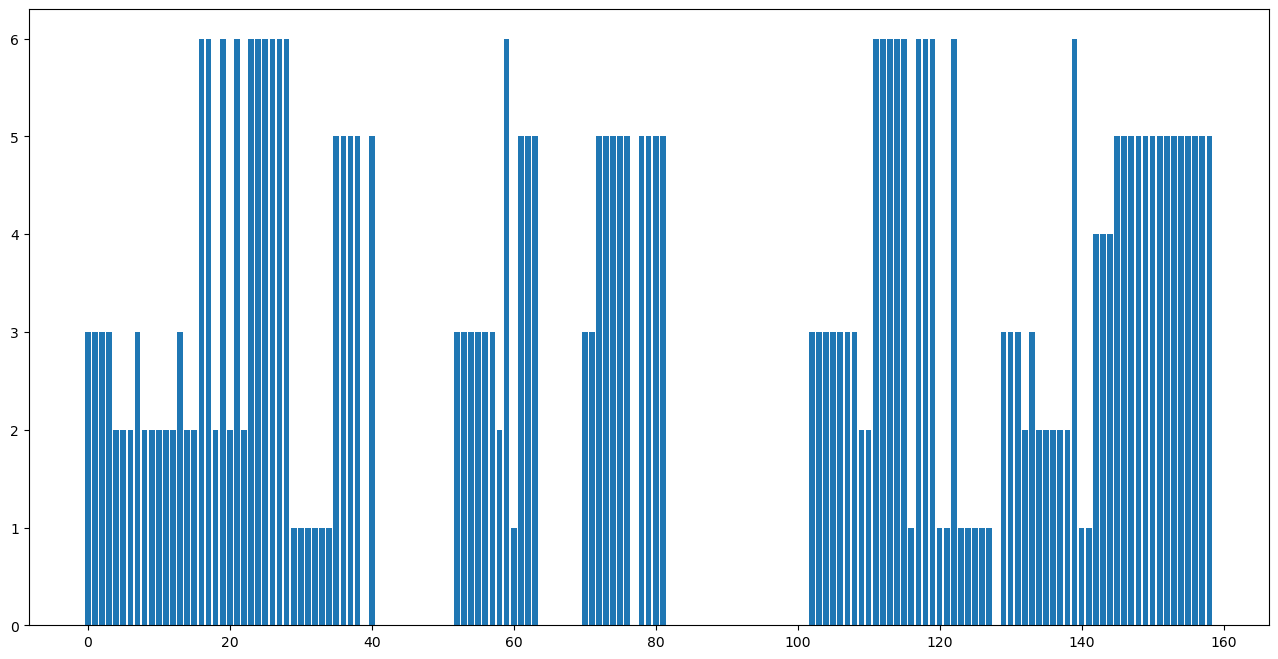

In [14]:
fig = plt.figure(figsize=(16,8))
plt.bar(range(len(model.labels_)),model.labels_)
plt.show()

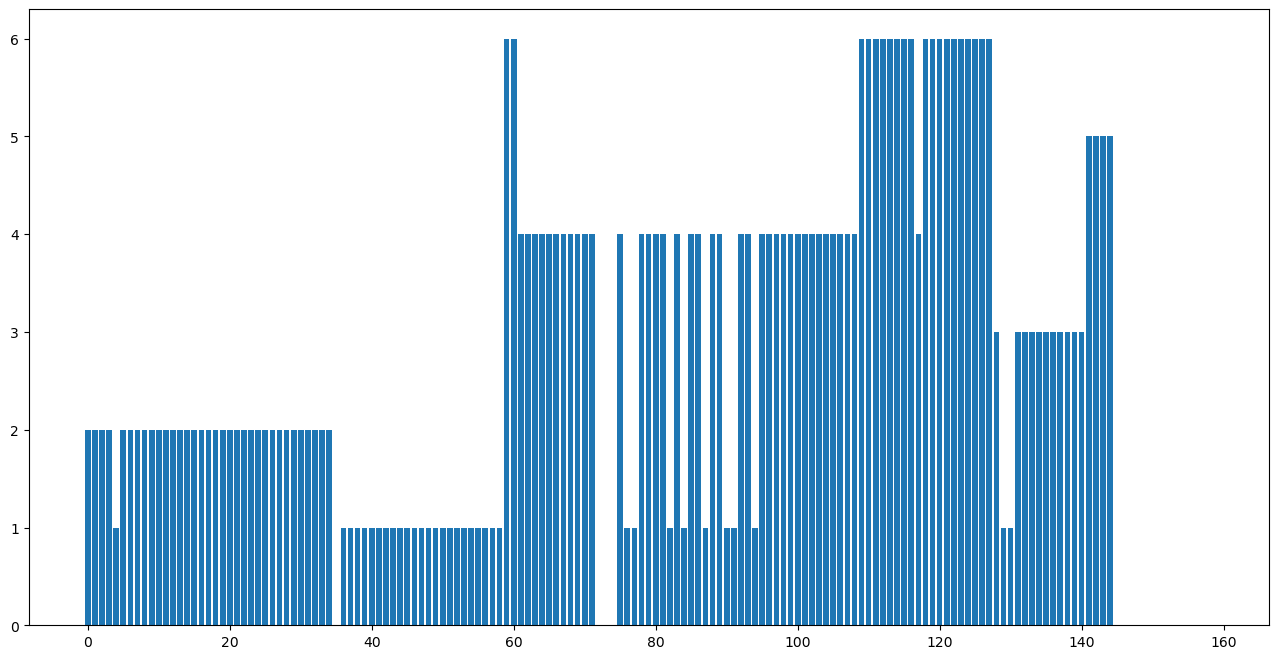

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normValues = scaler.fit_transform(values)

pca = PCA(n_components=5,whiten=True)
lowDimValues = pca.fit_transform(normValues)
model2 = KMeans(7)
model2.fit(lowDimValues)
fig = plt.figure(figsize=(16,8))
plt.bar(range(len(model2.labels_)),model2.labels_)
plt.show()

In [36]:
data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64